In [1]:
# Author: 1625920
# Module: Advanced Machine Learning Resit Assessment
# Submitted by : 6th May 2022

The main goal of this project is to predict the price of each house in the test set. 

In [2]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Student\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Student\anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.svm import SVR,LinearSVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder , StandardScaler ,MinMaxScaler , Normalizer ,LabelEncoder
from sklearn.feature_selection import RFECV
import pickle
from sklearn.metrics import mean_squared_error ,mean_absolute_error , mean_squared_log_error 

In [5]:
train_set = pd.read_csv("1625920- ResitData/train.csv", index_col='Id')
test_set = pd.read_csv("1625920- ResitData/test.csv", index_col='Id')
#data = pd.concat((train_set, test_set))
#data.shape



(2919, 80)

In [6]:
train_len = len(train_set)
test_len = len(test_set)

In [7]:
train_set.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [8]:
train_set.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [10]:
# Combining the dataset for Data cleaning and processing
X_train = train_set.drop(['SalePrice'], axis=1)
y = train_set.SalePrice

X = pd.concat([X_train, test_set], axis=0)

In [11]:
print("Train data's size: ", X_train.shape)
print("Test data's size: ", test_set.shape)

Train data's size:  (1460, 79)
Test data's size:  (1459, 79)


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


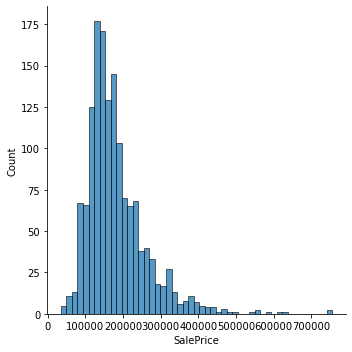

In [12]:
print(y.describe())
sns.displot(y, kde=False)

#    Data Analysis and Exploration

In [13]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>],
       [<AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>],
       [<AxesSubplot:title={'center':'Ful

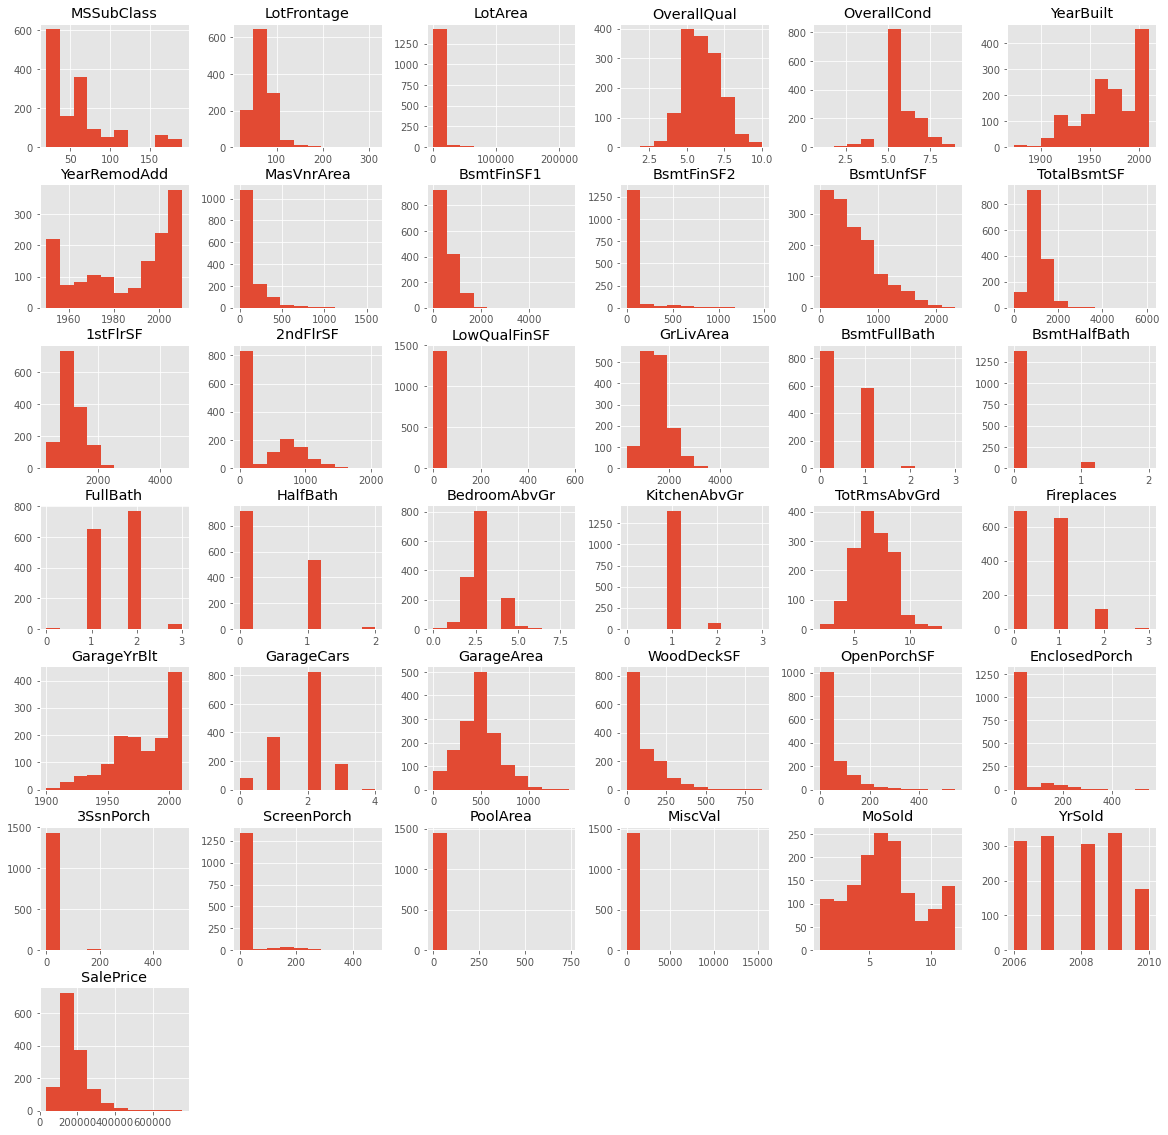

In [14]:
train_set.hist(figsize = (20, 20))

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


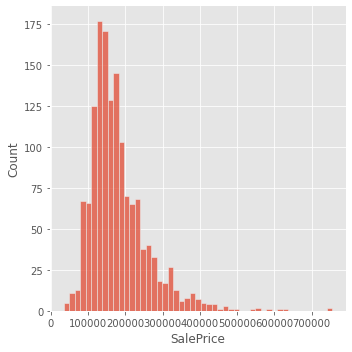

In [15]:
print(y.describe())
sns.displot(y, kde=False)

The skew of the Sale prices 1.8828757597682129


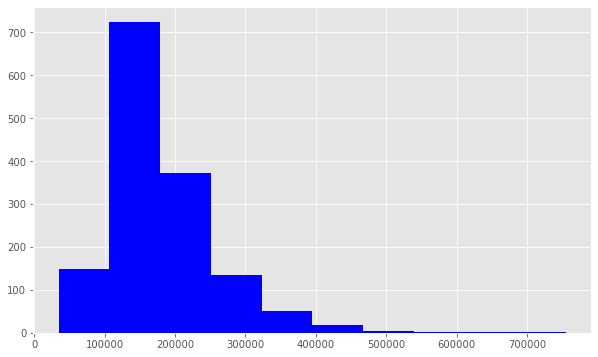

In [16]:
print("The skew of the Sale prices", y.skew())
plt.hist(y, color='blue')
plt.show()

The normalized skew is 0.12133506220520406


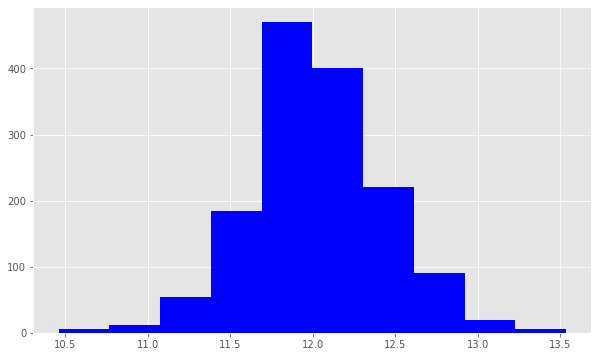

In [17]:
log_skew = np.log(y)
print("The normalized skew is", log_skew.skew())
plt.hist(log_skew, color = 'blue')
plt.show()

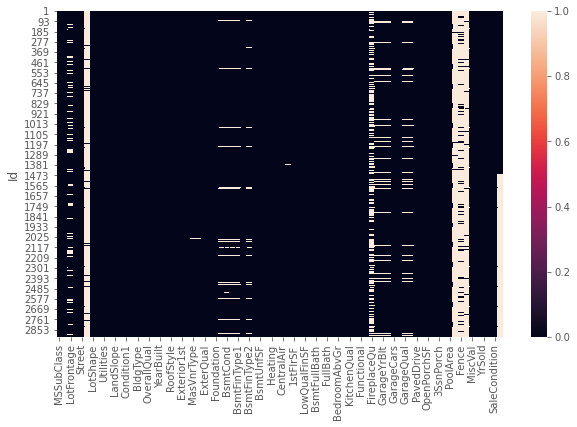

In [18]:
sns.heatmap(data.isnull())
plt.show()

<AxesSubplot:>

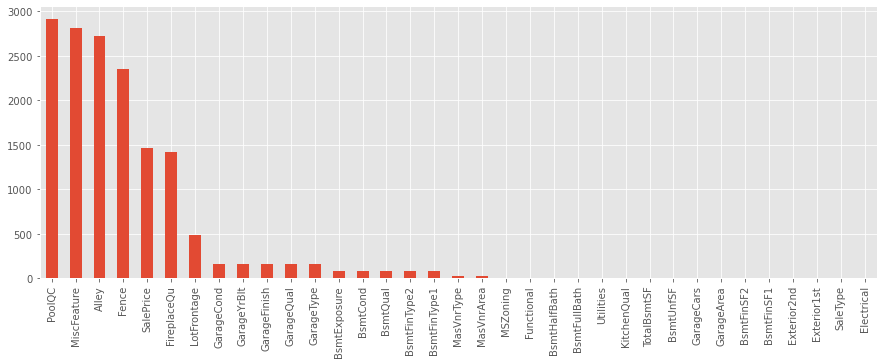

In [19]:
missing_values = data.isnull().sum()

missing_values = missing_values.drop(missing_values[missing_values == 0].index).sort_values(ascending=False)

missing_values.plot(kind='bar', figsize = (15, 5))

In [20]:
missing_data = pd.DataFrame({'Count': missing_values})

missing_data = missing_data[missing_data.Count > 0]
missing_data.sort_values(by='Count', ascending=False, inplace=True)

print("The number of features that have missing data are: ", missing_data.shape)
print("The most important features: ")
missing_data.head(10)

The number of features that have missing data are:  (35, 1)
The most important features: 


,Count
PoolQC,2909
MiscFeature,2814
Alley,2721
Fence,2348
SalePrice,1459
FireplaceQu,1420
LotFrontage,486
GarageFinish,159
GarageQual,159
GarageYrBlt,159


In [21]:
corr_values = train_set.corr().SalePrice.sort_values(ascending=False)
corr_values.head(11)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

<AxesSubplot:>

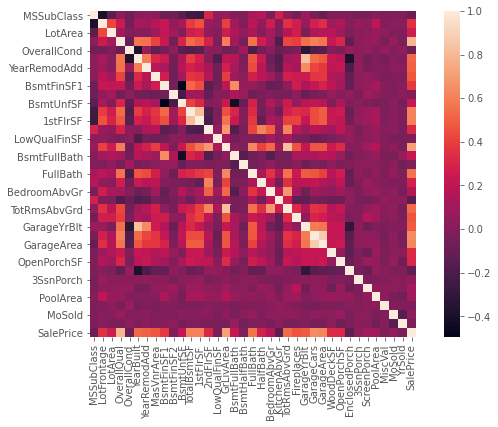

In [22]:
corr_train = train_set.corr()
sns.heatmap(corr_train, square=True)

<AxesSubplot:>

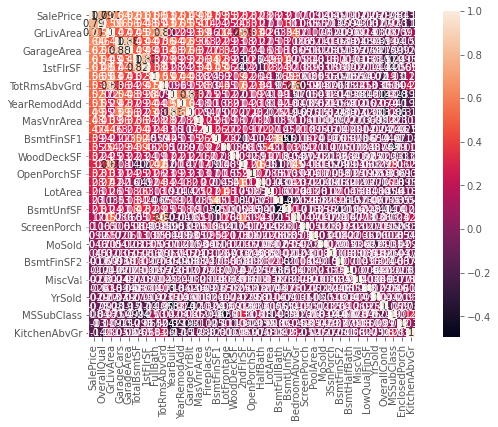

In [23]:
sns.heatmap(train_set[corr_values.index].corr(), square=True, annot=True)

# Data Preprocessing and Feature Engineering

 From the data presented, we can categorise the columns into numerical and non-numerical.In addition. the missing values in the columns will hinder the learning ability of the model. The chosen approach will be to use Data Imputation to replace the missing value.

In [29]:


group_1 = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "MasVnrType", "MSSubClass"]
X[group_1] = X[group_1].fillna("None")

group_2 = ["GarageArea", "GarageCars", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "MasVnrArea", "BsmtFullBath", "BsmtHalfBath"]
X[group_2] = X[group_2].fillna(0)

group_3a = ["MSZoning", "Electrical", "KitchenQual", "Exterior1st", "Exterior2nd", "SaleType", "Functional","Utilities"]

imputer = SimpleImputer(strategy='most_frequent')
X[group_3a] = pd.DataFrame(imputer.fit_transform(X[group_3a]), index=X.index)

X.LotFrontage = X.LotFrontage.fillna(X.LotFrontage.mean())
X.GarageYrBlt = X.GarageYrBlt.fillna(X.YearBuilt)

In [30]:
X_features = X + data["SalePrice"]

In [31]:
sum(X.isnull().sum())

0

The next step is to examine outliners as they are very sensitive to regression performance. In order to gain better quality training from regression methods

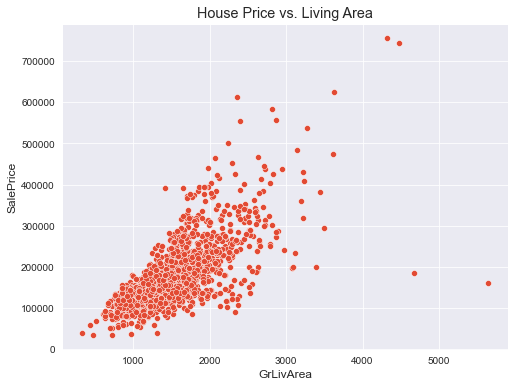

In [32]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_set)
title = plt.title('House Price vs. Living Area')

In [33]:
outlier_index = train_set[(train_set.GrLivArea > 4000) & (train_set.SalePrice < 200000)].index

X.drop(outlier_index, axis=0, inplace=True)
y.drop(outlier_index, axis=0, inplace=True)

In [34]:
print(X.columns.size)
X.columns

79


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [35]:
y

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1458, dtype: int64

In [36]:
X.shape

(2917, 79)

In [38]:
X['totalSqFeet'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']
X['totalBathroom'] = X.FullBath + X.BsmtFullBath + 0.5 * (X.HalfBath + X.BsmtHalfBath)
X['houseAge'] = X.YrSold - X.YearBuilt
X['reModeled'] = np.where(X.YearRemodAdd == X.YearBuilt, 0, 1)
X['isNew'] = np.where(X.YrSold == X.YearBuilt, 1, 0)

In [39]:
label_encoding_cols = ["Alley","BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
    "BsmtQual", "ExterCond", "ExterQual", "FireplaceQu", "Functional",
    "GarageCond", "GarageQual","GarageYrBlt", "HeatingQC", "KitchenQual", "LandSlope",
    "LotShape", "PavedDrive", "Street", "Utilities", 'PoolQC']

label_encoder = LabelEncoder()

for col in label_encoding_cols:
    X[col] = label_encoder.fit_transform(X[col])

In [40]:
skewness = train_set.skew().sort_values(ascending=False)
skewness[abs(skewness) > 0.75]

skewed_cols = list(skewness[abs(skewness) > 0.5].index)

skewed_cols = [ col for col in skewed_cols if col not in ['MSSubClass', 'SalePrice']]

for col in skewed_cols:
    X[col] = np.log(1 + X[col])

In [42]:
X = pd.get_dummies(X, drop_first=True)
print("X.shape:", X.shape)

X.shape: (2917, 210)


In [43]:
train = X[test_len:]
test = X[:test_len]


In [44]:
train.dropna()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,LandSlope,OverallQual,OverallCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1462,20,4.406719,9.565775,1,1,0,0,0,6,1.945910,...,0,0,0,0,1,0,0,0,1,0
1463,60,4.317488,9.534668,1,1,0,0,0,5,1.791759,...,0,0,0,0,1,0,0,0,1,0
1464,60,4.369448,9.208238,1,1,0,0,0,6,1.945910,...,0,0,0,0,1,0,0,0,1,0
1465,120,3.784190,8.518392,1,1,0,0,0,8,1.791759,...,0,0,0,0,1,0,0,0,1,0
1466,60,4.330733,9.210440,1,1,0,0,0,6,1.791759,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,3.091042,7.568896,1,1,3,0,0,4,2.079442,...,0,0,0,0,1,0,0,0,1,0
2916,160,3.091042,7.546974,1,1,3,0,0,4,1.791759,...,0,0,0,0,1,0,0,0,0,0
2917,20,5.081404,9.903538,1,1,3,0,0,5,2.079442,...,0,0,0,0,1,0,0,0,0,0


In [45]:
train.shape

(1458, 210)

In [46]:
train.describe()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,LandSlope,OverallQual,OverallCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.0,1458.000000,1458.000000,1458.000000,...,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,57.403978,4.195856,9.078660,0.995885,0.977366,1.951989,0.0,0.045267,6.079561,1.864982,...,0.002743,0.002058,0.080247,0.002743,0.862826,0.005487,0.008230,0.017833,0.825103,0.082305
std,42.750325,0.327309,0.502060,0.064040,0.270048,1.410968,0.0,0.217637,1.437027,0.177899,...,0.052324,0.045330,0.271768,0.052324,0.344149,0.073896,0.090379,0.132388,0.380009,0.274922
min,20.000000,3.091042,7.293698,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.693147,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.110874,8.908086,1.000000,1.000000,0.000000,0.0,0.000000,5.000000,1.791759,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,4.252854,9.148092,1.000000,1.000000,3.000000,0.0,0.000000,6.000000,1.791759,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,70.000000,4.369448,9.351167,1.000000,1.000000,3.000000,0.0,0.000000,7.000000,1.945910,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,190.000000,5.303305,10.943782,1.000000,2.000000,3.000000,0.0,2.000000,10.000000,2.302585,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
test.shape

(1459, 210)

In [48]:
y = np.log(y)


In [50]:
lr = LinearRegression().fit(train, y)
lr.score(train, y)

0.13745752420776725

In [51]:
reg = RandomForestRegressor(max_depth=19, random_state=0)
reg.fit(train, y)
reg.score(train, y)

0.7746705737118982

In [63]:
from sklearn.model_selection import KFold, cross_val_score

n_folds = 10


def getRMSLE(model):


   
    kf = KFold(n_folds, shuffle=True, random_state=42)

    # Get RMSLE score
    rmse = np.sqrt(-cross_val_score(
        model, train, y, scoring="neg_mean_squared_error", cv=kf))

    return rmse.mean()


In [64]:
from sklearn.linear_model import Ridge, Lasso

Best lambda: 25.0
RMSLE: 0.40981297268138583


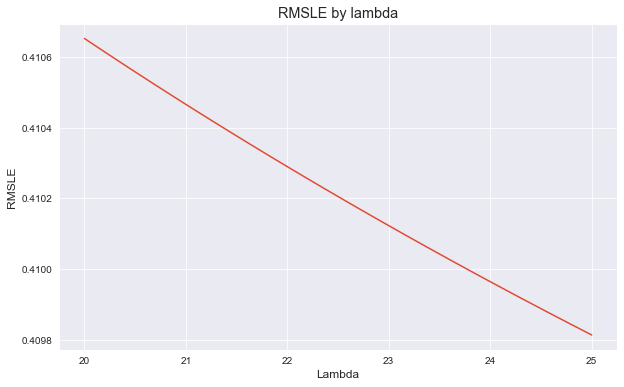

In [65]:
lambda_list = list(np.linspace(20, 25, 101))

rmsle_ridge = [getRMSLE(Ridge(alpha=lambda_)) for lambda_ in lambda_list]
rmsle_ridge = pd.Series(rmsle_ridge, index=lambda_list)

rmsle_ridge.plot(title="RMSLE by lambda")
plt.xlabel("Lambda")
plt.ylabel("RMSLE")

print("Best lambda:", rmsle_ridge.idxmin())
print("RMSLE:", rmsle_ridge.min())


In [55]:
from xgboost import XGBRegressor

In [56]:
xgb = XGBRegressor(learning_rate=0.05,n_estimators=2100,max_depth=2,
                   min_child_weight=2,
                   gamma=0,
                   subsample=0.65,
                   colsample_bytree=0.46,
                   nthread=-1,
                   scale_pos_weight=1,
                   reg_alpha=0.464,
                   reg_lambda=0.8571,
                   random_state=7,
                   n_jobs=2)
getRMSLE(xgb)    

0.4365216173829234

In [57]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor(objective='regression',
                    learning_rate=0.05,
                    n_estimators=730,
                    num_leaves=8,
                    min_data_in_leaf=4,
                    max_depth=3,
                    max_bin=55,
                    bagging_fraction=0.78,
                    bagging_freq=5,
                    feature_fraction=0.24,
                    feature_fraction_seed=9,
                    bagging_seed=9,
                    min_sum_hessian_in_leaf=11)
getRMSLE(lgb)

[LightGBM] [Warning] feature_fraction is set=0.24, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.24
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.78, subsample=1.0 will be ignored. Current value: bagging_fraction=0.78
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.24, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.24
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[Ligh

0.42679494096324255

In [58]:
my_model = lgb
my_model.fit(train, y)
predictions = my_model.predict(test)
final_predictions = np.exp(predictions) - 1
output = pd.DataFrame({'Id': test_set.index, 'SalePrice': final_predictions})
output.to_csv('submission.csv', index=False)

[LightGBM] [Warning] feature_fraction is set=0.24, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.24
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.78, subsample=1.0 will be ignored. Current value: bagging_fraction=0.78
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


In [59]:
def model_eval(model):
    model_fit = model.fit(train, y)
    R2 = cross_val_score(model_fit, train, y, cv=10 , scoring='r2').mean()
    MSE = -cross_val_score(lr, train, y, cv=10 , scoring='neg_mean_squared_error').mean()
    print('R2 Score:', R2, '|', 'MSE:', MSE)

In [60]:
lr = LinearRegression()
ri = Ridge(alpha=0.1, normalize=False)
ricv = RidgeCV(cv=5)
gdb = GradientBoostingRegressor(n_estimators=200)
lgb = LGBMRegressor(objective='regression',
                    learning_rate=0.05,
                    n_estimators=730,
                    num_leaves=8,
                    min_data_in_leaf=4,
                    max_depth=3,
                    max_bin=55,
                    bagging_fraction=0.78,
                    bagging_freq=5,
                    feature_fraction=0.24,
                    feature_fraction_seed=9,
                    bagging_seed=9,
                    min_sum_hessian_in_leaf=11)

In [61]:
for model in [lr, ri, ricv, gdb, lgb]:
    model_eval(model)

R2 Score: -0.2077644550694858 | MSE: 0.19095904670198272
R2 Score: -0.18930724296946583 | MSE: 0.19095904670198272
R2 Score: -0.08581661056077824 | MSE: 0.19095904670198272
R2 Score: -0.1336301591521471 | MSE: 0.19095904670198272
[LightGBM] [Warning] feature_fraction is set=0.24, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.24
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.78, subsample=1.0 will be ignored. Current value: bagging_fraction=0.78
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.24, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.24
[LightGBM] [Warning] min_data_in_